## Семинар 5: Тема: Парная линейная регрессия

Одномерная (простая) линейная регрессия – это метод, используемый для моделирования отношений между одной независимой входной переменной (переменной функции) и выходной зависимой переменной. Модель линейная.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


В данных содержатся следующие признаки:

Hours — количество часов, которое студент потратил на подготовку к контрольной

Scores— баллы, которые он набрал


Задача: Предсказать баллы в зависимости от количества часов на подготовку.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
x = df['Hours']
y = df['Scores']

In [12]:
x.isna().sum(), y.isna().sum()

(0, 0)

In [13]:
len(x)

25

Для визуального представления построим точечный график:

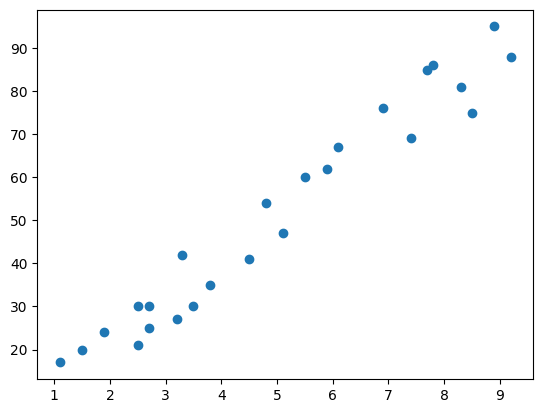

In [14]:
plt.figure()
plt.scatter(x, y)
plt.show()

Линейная зависимость прослеживается в данных. Значит, можно использовать 
парную линейную регрессию.

 Создадим конструктор класса, который будет реализовывать метод парной линейной регрессии:

In [15]:
class hypothesis:
 
    def __init__(self): #конструктор класса
        self.b0 = 0    #атрибут  b0 - один параметр регрессии - инициализируем его нулём
        self.b1 = 0      #атрибут  b1 - второй параметр регрессии- инициализируем его тоже нулём
        
    def predict(self,x): # метод predict реализует саму регрессию
        return self.b0 + self.b1 * x  
    
    def error(self, X, Y):  # метод predict -error ошибки- среднеквадратическое отклонение (MSE) 
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def BGD_simply(self, X, Y):   # метод BGD_simply реализует метод градиентного спуска с параметром alpha - скорость обучения
        alpha = 0.005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0       # обновлённый параметр регрессии b0
        self.b1 -= alpha * dJ1       # обновлённый параметр регрессии b1
        
    def BGD(self, X, Y, alpha=0.005, accuracy=0.01, max_steps=50):
        """реализует метод градиентного спуска, который запускается в цикле пока ошибка не перестанет меняться 
        существенно"""
        steps, errors = [], [] #заводим пустые массивы счётчиков и ошибок
        step = 0 #заводим счётчик итераций       
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step<max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y) #вычисляем ошибку
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step) #добавляем номер счётчика в массив счётчиков
            errors.append(new_err) #добавляем значение ошибки в массив ошибок
        return steps, errors #возвращает массив ошибок на каждой итерации спуска и номер итерации
    
    def get_lineal_func(self):
        return "y = {:.2f} + {:.2f}x".format(self.b0, self.b1)


Создадим объект регрессии:

In [16]:
hyp = hypothesis()

Выведем начальное значение ошибки:

In [17]:
J = hyp.error(x, y)
print("initial error:", J)

initial error: 1632.02


Реализуем метод регрессии с нулевыми параметрами регрессии b0 и b1:

In [18]:
X0 = np.linspace(x.min(), x.max(), len(x)) #генерируем последовательность чисел от 60 до 180 с одинаковым размером шага из 100 значений
Y0 = hyp.predict(X0) #находим соответствующие значениям X0 значения Y0 на прямой в соответствии с методом регрессии

Изобразим данные и линию регрессии на одном графике:

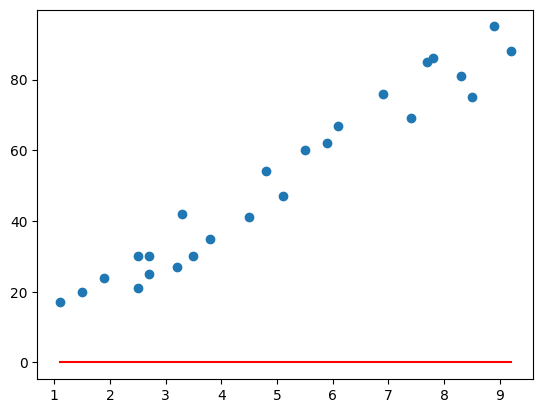

In [19]:
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r') # построение красной прямой
plt.show()

Видно, что пока линия регрессии распределению данных не соответствует.

Теперь реализуем метод градиентного спуска. Он должен обновить параметры 
регрессии b0 и b1 в соответствии в формулами градиентного спуска:

In [20]:
hyp.BGD_simply(x, y)

Далее снова найдём значение ошибки, увидим, что она уменьшилась:

In [21]:
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1155.144986060023


Найдём новые значения YO для линии регрессии:

In [22]:
Y0 = hyp.predict(X0)

Снова изобразим данные и линию регрессии на одном графике.

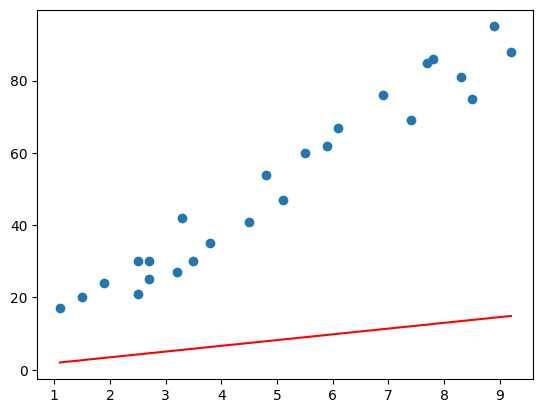

In [23]:
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r') # построение красной прямой
plt.show()

Видно, что линия на графике существенно приблизилось к точкам. Конечно, наша модель еще далека от совершенства. Мы прошли всего лишь одну итерацию градиентного спуска.

Запустим градиентный спуск, который делает нужное количество итераций, до приемлемого значения, и выведем значение ошибки:

In [24]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 14.535795382507924


Как мы видим, теперь ошибка снизилась гораздо больше. Однако, она все еще не достигла нуля. 
Заметим, что нулевая ошибка не всегда возможна в принципе из-за того, что точки данных не всегда будут 
располагаться на одной линии. Нужно стремиться не к нулевой, а к минимально возможной ошибке. 

Построим соответствующий график:

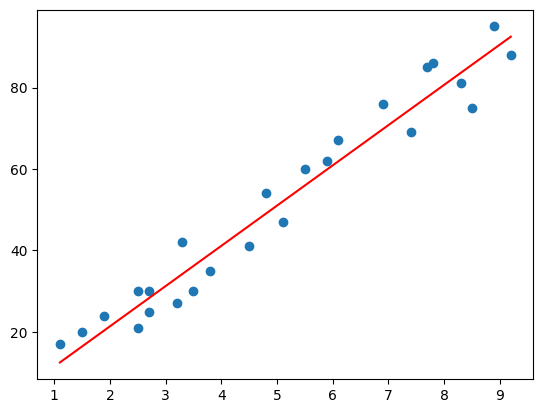

In [25]:
X0 = np.linspace(x.min(), x.max(), len(x))
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Линия регрессии довольно похожа на оптимальную. Так ли это на самом деле, глядя на график, сказать сложно, 
для этого нужно проанализировать, как ошибка регрессии менялась со временем. Построим график изменения ошибки в
зависимости от итераций:

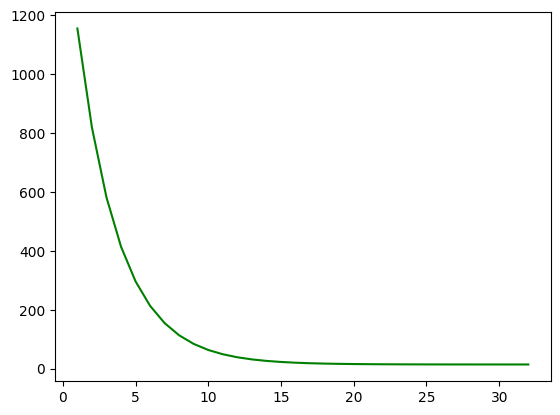

In [26]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

На графике наглядно видно, что в начале обучения ошибка падала быстро, но в ходе градиентного спуска она 
вышла на плато. Учитывая, что мы используем гладкую функцию ошибки второго порядка, это свидетельствует о 
том, что мы достигли локального оптимума и дальнейшее повторение алгоритма не принесет улучшения модели.

In [27]:
hyp.get_lineal_func()

'y = 1.62 + 9.88x'